# CS_285 
# HW2: Policy Gradients
# Zhengpu Zhao


# 1 Introduction

### The goal of this assignment is to experiment with policy gradient and its variants, including variance reduction tricks such as implementing reward-to-go and neural network baselines. The startercode can be found at:
    https://github.com/berkeleydeeprlcourse/homework_fall2022/tree/master/hw2
    
# 2 Review of a bunch of stuff
### Not Included Here, Check Assignment PDF

### Helper function for Tensor Board to Pandas Data Frame

# 3 Overview of Implementation
### 3.1 Files 
#### To implement policy gradients, we will be building up the code that we started in homework 1.All files needed to run your code are in the hw2 folder, but there will be some blanks you will fill with your solutions from homework 1. These locations are marked with # TODO: get this from hw1 and are found in the following files:
    • infrastructure/rl_trainer.py
    • infrastructure/utils.py
    • policies/MLP_policy.py
#### After bringing in the required components from the previous homework, you can begin work on the new policy gradient code. These placeholders are marked with TODO, located in the following files:
    • agents/pg_agent.py
    • policies/MLP_policy.py
#### The script to run the experiments is found in scripts/run_hw2.py

### 3.2 Overview
#### As in the previous homework, the main training loop is implemented in infrastructure/rl_trainer.py.
#### The policy gradient algorithm uses the following 3 steps:
1. Sample trajectories by generating rollouts under your current policy.
2. Estimate returns and compute advantages. This is executed in the train function of pg agent.py
3. Train/Update parameters. The computational graph for the policy and the baseline, as well as the update functions, are implemented in policies/MLP_policy.py.

# 4 Implementing Policy Gradients
### pgagent.py --> Class PGAgent --> calculate_q_vals --> two cases
#### “Case 1” uses the discounted cumulative return of the full trajectory
#### “Case 2” uses the “reward-to-go”

In [1]:
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
def tabulate_events(dpath):
    summary_iterators = [EventAccumulator(os.path.join(dpath, dname)).Reload() for dname in os.listdir(dpath)]

    tags = summary_iterators[0].Tags()['scalars']

    for it in summary_iterators:
        assert it.Tags()['scalars'] == tags

    out = defaultdict(list)
    steps = []

    for tag in tags:
        steps = [e.step for e in summary_iterators[0].Scalars(tag)]

        for events in zip(*[acc.Scalars(tag) for acc in summary_iterators]):
            assert len(set(e.step for e in events)) == 1

            out[tag].append([e.value for e in events])

    return out, steps


def to_df(dpath):
    dirs = os.listdir(dpath)

    d, steps = tabulate_events(dpath)
    tags, values = zip(*d.items())
    np_values = np.array(values)
    
    whole_df = pd.DataFrame()

    for index, tag in enumerate(tags):
        values_col = np_values[index]
        sq_val = values_col.squeeze()
        if sq_val.shape == ():
            a_col = sq_val.reshape((1,))
        else:
            a_col = sq_val
        whole_df[tag] = a_col
    
    return whole_df
    
def get_file_path(dpath, tag):
    file_name = tag.replace("/", "_") + '.csv'
    folder_path = os.path.join(dpath, 'csv')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return os.path.join(folder_path, file_name)

# 5 Small-Scale Experiments

### Experiment 1 (CartPole). 
Run multiple experiments with the PG algorithm on the discrete CartPole-v0 environment, using the following commands:

    python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 1000 \
        -dsa --exp_name q1_sb_no_rtg_dsa
        
    python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 1000 \
        -rtg -dsa --exp_name q1_sb_rtg_dsa
        
    python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 1000 \
        -rtg --exp_name q1_sb_rtg_na
        
    python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 5000 \
        -dsa --exp_name q1_lb_no_rtg_dsa
        
    python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 5000 \
        -rtg -dsa --exp_name q1_lb_rtg_dsa
        
    python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 5000 \
        -rtg --exp_name q1_lb_rtg_na

### What’s happening here:
    • -n : Number of iterations.
    • -b : Batch size (number of state-action pairs sampled while acting according to the current policy at each iteration).
    • -dsa : Flag: if present, sets standardize_advantages to False. Otherwise, by default, standardizes advantages to have a mean of zero and standard deviation of one.
    • -rtg : Flag: if present, sets reward_to_go=True. Otherwise, reward_to_go=False by default.
    • --exp_name : Name for experiment, which goes into the name for the data logging directory. Various other command line arguments will allow you to set batch size, learning rate, network architecture, and more. You can change these as well, but keep them fixed between the 6 experiments mentioned above.
    
### What to Expect:
    • The best configuration of CartPole in both the large and small batch cases should converge to a maximum score of 200.

In [4]:
# NOTE:
# ZZP: ImportError will occur, but does not affect function
# ZZP: also, disabled ime logging...
#logdir = logdir_prefix + args.exp_name + '_' + args.env_name
q1_sb_no_rtg_dsa = "q2_pg_q1_sb_no_rtg_dsa_CartPole-v0"
q1_sb_rtg_dsa = "q2_pg_q1_sb_rtg_dsa_CartPole-v0"
q1_sb_rtg_na = "q2_pg_q1_sb_rtg_na_CartPole-v0"
q1_lb_no_rtg_dsa = "q2_pg_q1_lb_no_rtg_dsa_CartPole-v0"
q1_lb_rtg_dsa = "q2_pg_q1_lb_rtg_dsa_CartPole-v0"
q1_lb_rtg_na = "q2_pg_q1_lb_rtg_na_CartPole-v0"

# Import Error here, but still works
q1_sb_no_rtg_dsa_df = to_df(q1_sb_no_rtg_dsa)
q1_sb_rtg_dsa_df = to_df(q1_sb_rtg_dsa)
q1_sb_rtg_na_df = to_df(q1_sb_rtg_na)
q1_lb_no_rtg_dsa_df = to_df(q1_lb_no_rtg_dsa)
q1_lb_rtg_dsa_df = to_df(q1_lb_rtg_dsa)
q1_lb_rtg_na_df = to_df(q1_lb_rtg_na)

print("converted all to data frames")

converted all to data frames


### Deliverables for report:

    • Provide the exact command line configurations you used to run your experiments, including any parameters changed from their defaults.
    
###### NO OTHER PARAMETERS ARE CHANGED
    
    • Create two graphs:
        – In the first graph, compare the learning curves (average return at each iteration) for the experiments prefixed with q1_sb_. (The small batch experiments.)
        – In the second graph, compare the learning curves for the experiments prefixed with q1_lb_. (The large batch experiments.)
        
###### AS SHOWN BELOW

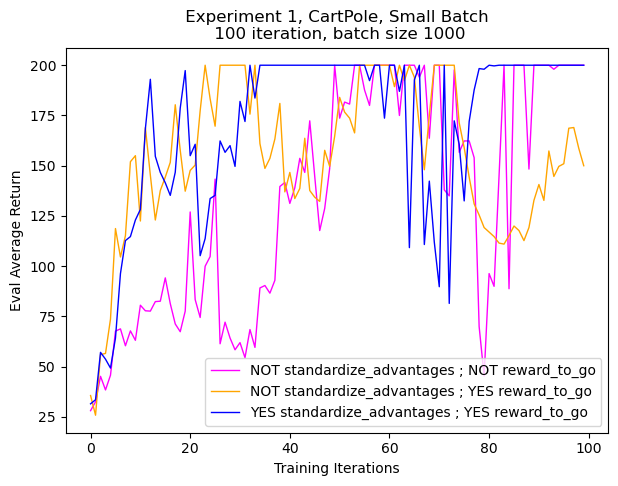

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(q1_sb_no_rtg_dsa_df["Eval_AverageReturn"], color = 'magenta', linewidth=1)
plt.plot(q1_sb_rtg_dsa_df["Eval_AverageReturn"], color = 'orange', linewidth=1)
plt.plot(q1_sb_rtg_na_df["Eval_AverageReturn"], color = 'blue', linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 1, CartPole, Small Batch \n 100 iteration, batch size 1000")
plt.legend(["NOT standardize_advantages ; NOT reward_to_go", 
            "NOT standardize_advantages ; YES reward_to_go", 
            "YES standardize_advantages ; YES reward_to_go"],fontsize=10)
plt.show()

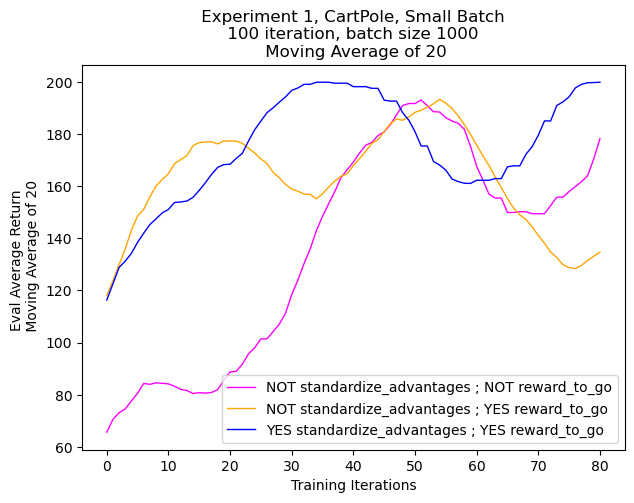

In [6]:
N = 20

plt.figure(figsize=(7, 5))
plt.plot(np.convolve(q1_sb_no_rtg_dsa_df["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), 
         color = 'magenta', linewidth=1)
plt.plot(np.convolve(q1_sb_rtg_dsa_df["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), 
         color = 'orange', linewidth=1)
plt.plot(np.convolve(q1_sb_rtg_na_df["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), 
         color = 'blue', linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title(" Experiment 1, CartPole, Small Batch \n 100 iteration, batch size 1000 \n Moving Average of 20")
plt.legend(["NOT standardize_advantages ; NOT reward_to_go", 
            "NOT standardize_advantages ; YES reward_to_go", 
            "YES standardize_advantages ; YES reward_to_go"],fontsize=10)
plt.show()

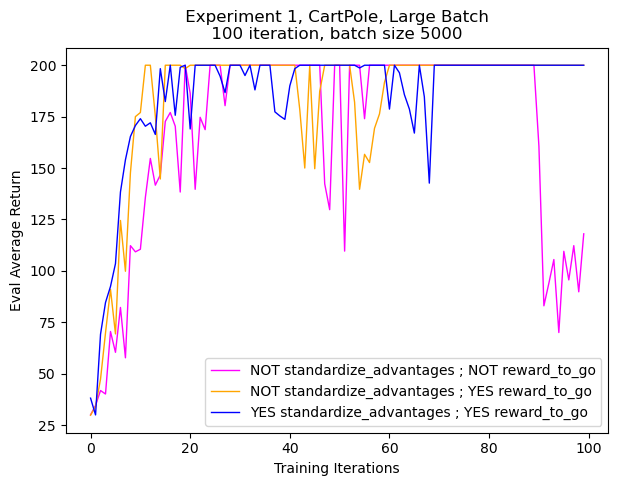

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(q1_lb_no_rtg_dsa_df["Eval_AverageReturn"], color = 'magenta', linewidth=1)
plt.plot(q1_lb_rtg_dsa_df["Eval_AverageReturn"], color = 'orange', linewidth=1)
plt.plot(q1_lb_rtg_na_df["Eval_AverageReturn"], color = 'blue', linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 1, CartPole, Large Batch \n 100 iteration, batch size 5000 ")
plt.legend(["NOT standardize_advantages ; NOT reward_to_go", 
            "NOT standardize_advantages ; YES reward_to_go", 
            "YES standardize_advantages ; YES reward_to_go"],fontsize=10)
plt.show()

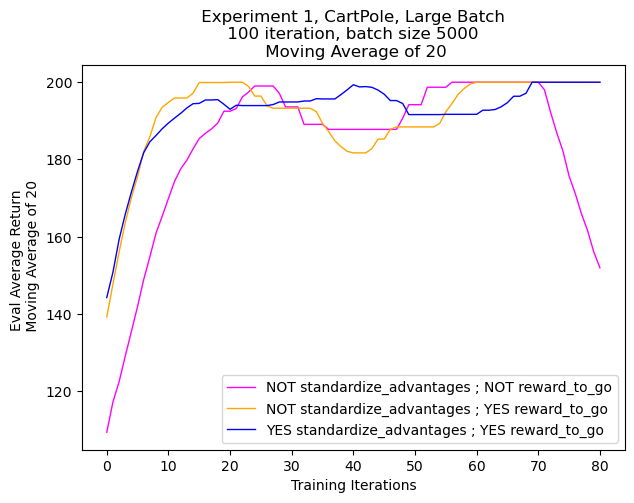

In [8]:
N = 20

plt.figure(figsize=(7, 5))
plt.plot(np.convolve(q1_lb_no_rtg_dsa_df["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), 
                     color = 'magenta', linewidth=1)
plt.plot(np.convolve(q1_lb_rtg_dsa_df["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), 
                     color = 'orange', linewidth=1)
plt.plot(np.convolve(q1_lb_rtg_na_df["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), 
                     color = 'blue', linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title(" Experiment 1, CartPole, Large Batch \n 100 iteration, batch size 5000 \n Moving Average of 20")
plt.legend(["NOT standardize_advantages ; NOT reward_to_go", 
            "NOT standardize_advantages ; YES reward_to_go", 
            "YES standardize_advantages ; YES reward_to_go"],fontsize=10)
plt.show()

### Deliverables for report:
#### Answer the following questions briefly:
1. Which value estimator has better performance without advantage-standardization: the trajectory-centric one, or the one using reward-to-go?

    Without advantage-standardization, value estimator using reward-to-go has better performance; the agent using reward-to-go value estimation converge to the maximum score of 200 slightly faster, with both small batch and large batch. Although, in the case with no advantage-standardization, the policy tend to go off-track and unlearn since high variance in advantage may lead to large wrong step into false direction against true optimization.
    

2. Did advantage standardization help?

    Yes, advantage standardization helped. Comparing the agents using reward-to-do with and without advantage standardization, we find that the one with advantage standardization has less 'off-track unlearning' perhaps due to less variance in taking steps, or in other words, less huge mistakes.


3. Did the batch size make an impact?
    
    Yes, larger batch size led to earlier convergence to the maximum score of 200. I think with larger batch size, the loss for advantage estimation would have less variance which led to faster learning, and smoother convergence.
    

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------

### Experiment 2 (InvertedPendulum). 

Run experiments on the InvertedPendulum-v4 continuous control environment as follows:

    python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
        --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b <b*> -lr <r*> -rtg \
        --exp_name q2_b<b*>_r<r*>


With Brute Force Grid Search, Shell Script:

    for batchsize in 500 1000 2000 5000 10000
    do
        for learningrate in 0.01 0.005 0.001 0.0005 0.0001
        do
            python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
            --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b $batchsize -lr $learningrate -rtg \
            --exp_name q2_b"$batchsize"_r"$learningrate"
        done
    done

In [9]:
result_dict = dict()
for batchsize in [500,1000,2000,5000,10000]:
    for learningrate in [0.01,0.005,0.001,0.0005,0.0001]:
        filepath = 'q2_pg_q2_b{}_r{}_InvertedPendulum-v4'.format(batchsize,learningrate)
        a_df = to_df(filepath)
        key = 'batchsize = {} ; learningrate = {}'.format(batchsize,learningrate)
        result_dict[key] = a_df["Eval_AverageReturn"]

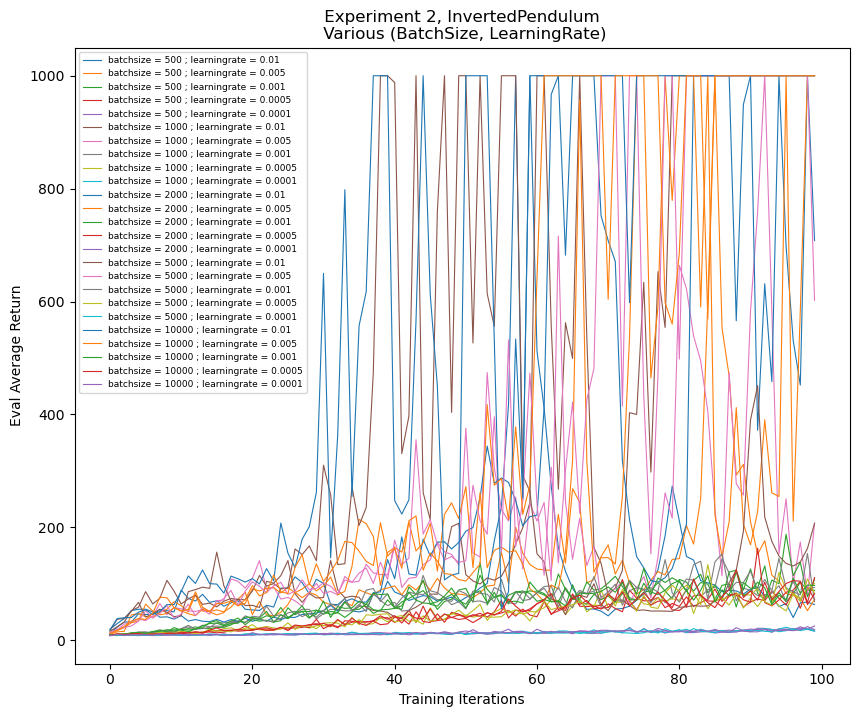

In [10]:
legend_list = []
plt.figure(figsize=(10, 8))

for itr, key in enumerate(result_dict):
    plt.plot(result_dict[key], linewidth=0.8)
    legend_list.append(key)
    
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 2, InvertedPendulum \n Various (BatchSize, LearningRate)")
plt.legend(legend_list,fontsize=6.5)
plt.show()

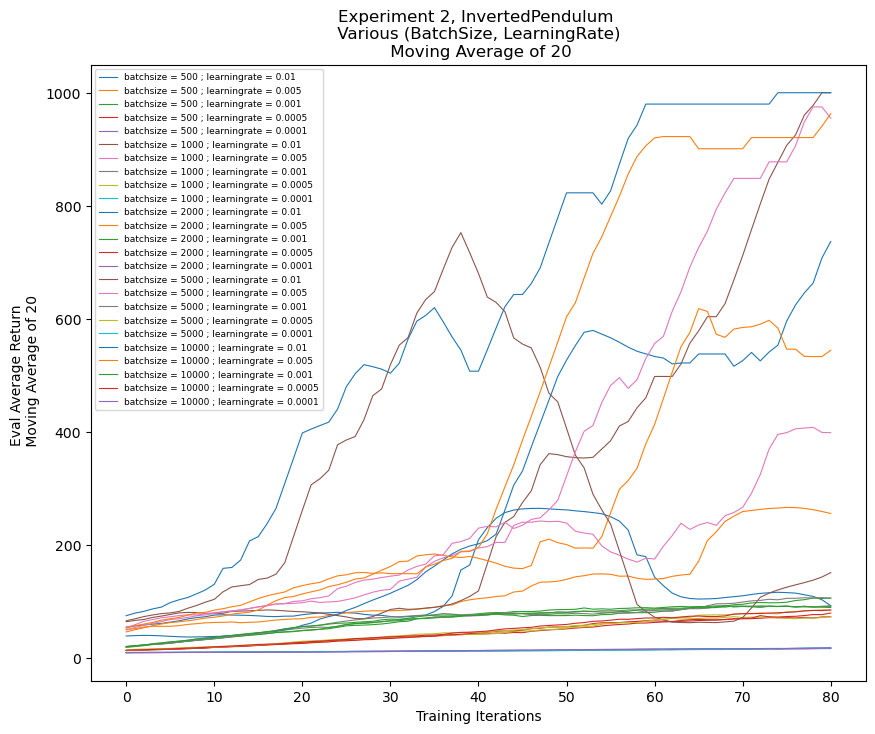

In [11]:
N = 20
legend_list = []
plt.figure(figsize=(10, 8))

for itr, key in enumerate(result_dict):
    plt.plot(np.convolve(result_dict[key], np.ones(N)/N, mode='valid'), linewidth=0.8)
    legend_list.append(key)
    
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title("Experiment 2, InvertedPendulum \n Various (BatchSize, LearningRate) \n Moving Average of 20")
plt.legend(legend_list,fontsize=6.5)
plt.show()

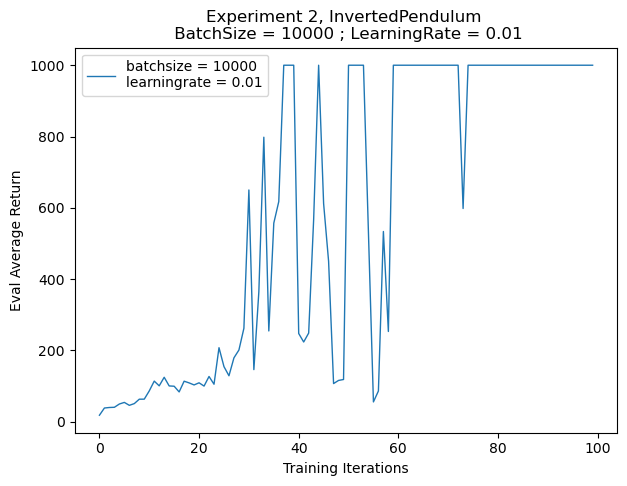

In [12]:
legend_list = ['batchsize = 10000 \nlearningrate = 0.01']
plt.figure(figsize=(7, 5))
plt.plot(result_dict['batchsize = 10000 ; learningrate = 0.01'], linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title("Experiment 2, InvertedPendulum \n BatchSize = 10000 ; LearningRate = 0.01")
plt.legend(legend_list,fontsize=10)
plt.show()

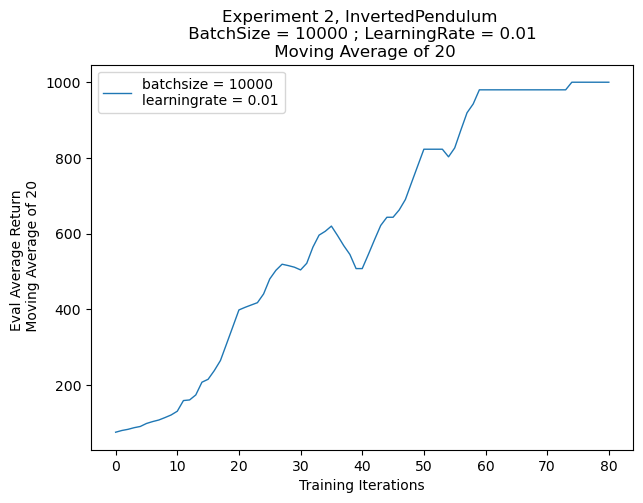

In [13]:
N = 20
legend_list = ['batchsize = 10000 \nlearningrate = 0.01']
plt.figure(figsize=(7, 5))
plt.plot(np.convolve(result_dict['batchsize = 10000 ; learningrate = 0.01'], np.ones(N)/N, mode='valid')
         , linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title("Experiment 2, InvertedPendulum \n BatchSize = 10000 ; LearningRate = 0.01 \n Moving Average of 20")
plt.legend(legend_list,fontsize=10)
plt.show()

# 6 Implementing Neural Network Baselines
### You will now implement a value function as a state-dependent neural network baseline. This will require filling in some TODO sections skipped in Section 4. In particular:

        This neural network will be trained in the update method of MLPPolicyPG along with the policy gradient update. (Hint: sum_{t=0}^{T-1} [grad [log pi(a_t|s_t) * (Q_t - b_t)]])
        
        In pg_agent.py:estimate advantage, the predictions of this network will be subtracted from the reward-to-go to yield an estimate of the advantage. This implements: ...

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------

# 7 More Complex Experiments
## Experiment 3 (LunarLander).
### You will now use your policy gradient implementation to learn a controller for LunarLanderContinuous-v2. The purpose of this problem is to test and help you debug your baseline implementation from Section 6.
### Run the following command:

    python cs285/scripts/run_hw2.py \
        --env_name LunarLanderContinuous-v2 --ep_len 1000 \
        --discount 0.99 -n 100 -l 2 -s 64 -b 40000 -lr 0.005 \
        --reward_to_go --nn_baseline --exp_name q3_b40000_r0.005
        
### Deliverables:

    Plot a learning curve for the above command. You should expect to achieve an average return of around 180 by the end of training.


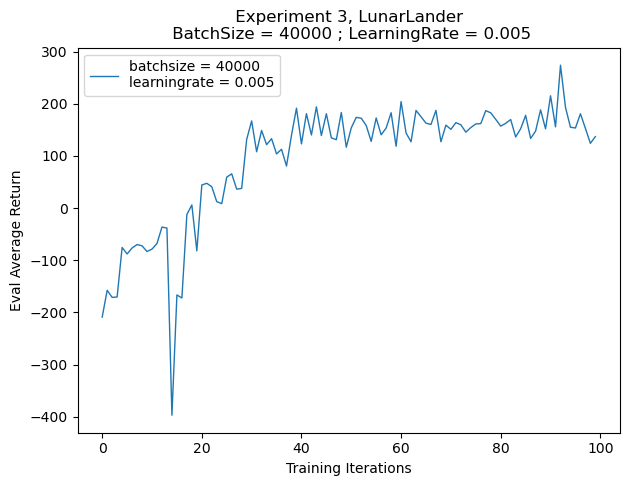

In [14]:
filepath = 'q2_pg_q3_b40000_r0.005_LunarLanderContinuous-v2'
a_df = to_df(filepath)

legend_list = ['batchsize = 40000 \nlearningrate = 0.005']
plt.figure(figsize=(7, 5))
plt.plot(a_df["Eval_AverageReturn"], linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 3, LunarLander \n BatchSize = 40000 ; LearningRate = 0.005")
plt.legend(legend_list,fontsize=10)
plt.show()

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------

## Experiment 4 (HalfCheetah).
### You will be using your policy gradient implementation to learn a controller for the HalfCheetah-v2 benchmark environment with an episode length of 150. This is shorter than the default episode length (1000), which speeds up training significantly. Search over batch sizes b ∈ [10000, 30000, 50000] and learning rates r ∈ [0.005, 0.01, 0.02] to replace \<b> and \<r> below.

    python cs285/scripts/run_hw2.py --env_name HalfCheetah-v4 --ep_len 150 \
        --discount 0.95 -n 100 -l 2 -s 32 -b <b> -lr <r> -rtg --nn_baseline \
        --exp_name q4_search_b<b>_lr<r>_rtg_nnbaseline
        
### Deliverables:

    Provide a single plot with the learning curves for the HalfCheetah experiments that you tried. Describe in words how the batch size and learning rate affected task performance.


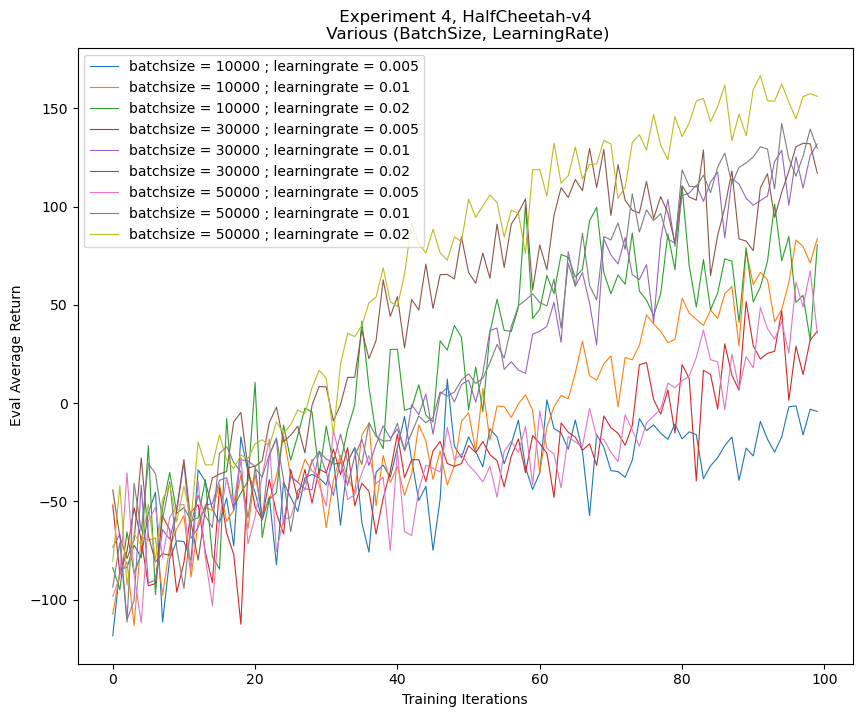

In [15]:
result_dict = dict()
for batchsize in [10000,30000,50000]:
    for learningrate in [0.005,0.01,0.02]:
        filepath = 'q2_pg_q4_search_b{}_r{}_rtg_nnbaseline_HalfCheetah-v4'.format(batchsize,learningrate)
        a_df = to_df(filepath)
        key = 'batchsize = {} ; learningrate = {}'.format(batchsize,learningrate)
        result_dict[key] = a_df["Eval_AverageReturn"]

legend_list = []
plt.figure(figsize=(10, 8))

for itr, key in enumerate(result_dict):
    plt.plot(result_dict[key], linewidth=0.8)
    legend_list.append(key)
    
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 4, HalfCheetah-v4 \n Various (BatchSize, LearningRate)")
plt.legend(legend_list,fontsize=10)
plt.show()

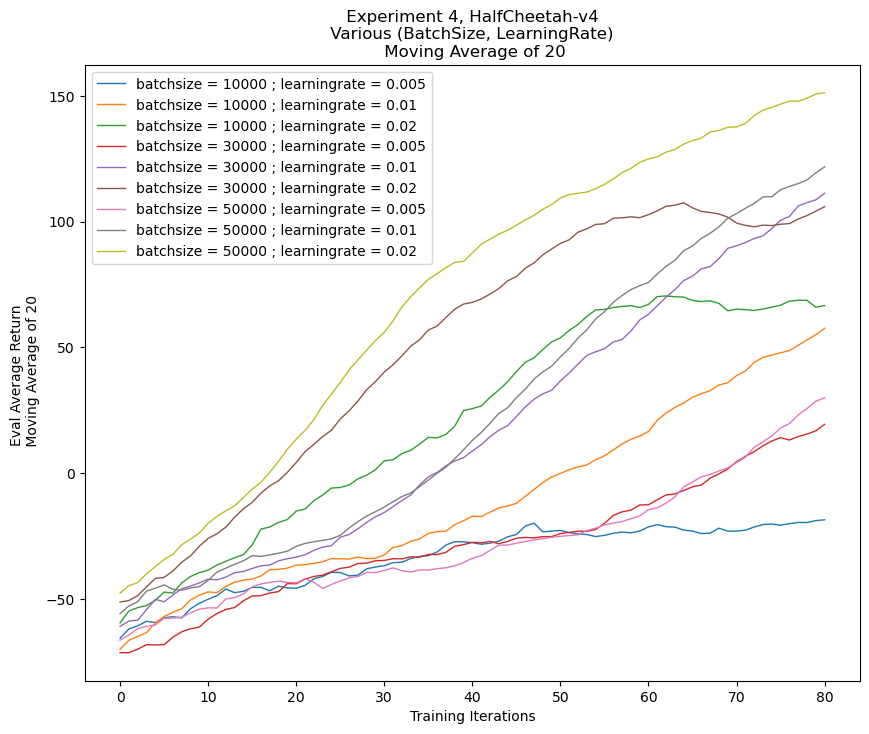

In [16]:
N = 20
legend_list = []
plt.figure(figsize=(10, 8))

for itr, key in enumerate(result_dict):
    plt.plot(np.convolve(result_dict[key], np.ones(N)/N, mode='valid'), linewidth=1)
    legend_list.append(key)
    
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title(" Experiment 4, HalfCheetah-v4 \n Various (BatchSize, LearningRate) \n Moving Average of 20")
plt.legend(legend_list,fontsize=10)
plt.show()

### Describe in words how the batch size and learning rate affected task performance.
    
    Best Hyperparameters for batch size and learning rate:
        Batch Size = 50000 ; Learning Rate = 0.02
    Learning rate of 0.02 seems most approperiate. 0.005 is too small, noticeably for all batch sizes, the experiment with learning rate 0.005 performs the worst.
    Batch size wise, 50000 performs the best, however the improvement over 30000 is not remarkable.

### Once you’ve found optimal values b* and r*, use them to run the following commands (replace the terms in angle brackets):

        python cs285/scripts/run_hw2.py --env_name HalfCheetah-v4 --ep_len 150 \
            --discount 0.95 -n 100 -l 2 -s 32 -b <b*> -lr <r*> \
            --exp_name q4_b<b*>_r<r*>
        python cs285/scripts/run_hw2.py --env_name HalfCheetah-v4 --ep_len 150 \
            --discount 0.95 -n 100 -l 2 -s 32 -b <b*> -lr <r*> -rtg \
            --exp_name q4_b<b*>_r<r*>_rtg
        python cs285/scripts/run_hw2.py --env_name HalfCheetah-v4 --ep_len 150 \
            --discount 0.95 -n 100 -l 2 -s 32 -b <b*> -lr <r*> --nn_baseline \
            --exp_name q4_b<b*>_r<r*>_nnbaseline
        python cs285/scripts/run_hw2.py --env_name HalfCheetah-v4 --ep_len 150 \
            --discount 0.95 -n 100 -l 2 -s 32 -b <b*> -lr <r*> -rtg --nn_baseline \
            --exp_name q4_b<b*>_r<r*>_rtg_nnbaseline
            
### Deliverables:

    Provide a single plot with the learning curves for these four runs. The run with both reward-to-go and the baseline should achieve an average score close to 200.

In [17]:
filepath_1 = 'q2_pg_q4_b50000_r0.02_HalfCheetah-v4'
filepath_2 = 'q2_pg_q4_b50000_r0.02_rtg_HalfCheetah-v4'
filepath_3 = 'q2_pg_q4_b50000_r0.02_nnbaseline_HalfCheetah-v4'
filepath_4 = 'q2_pg_q4_b50000_r0.02_rtg_nnbaseline_HalfCheetah-v4'
a_df_1 = to_df(filepath_1)
a_df_2 = to_df(filepath_2)
a_df_3 = to_df(filepath_3)
a_df_4 = to_df(filepath_4)

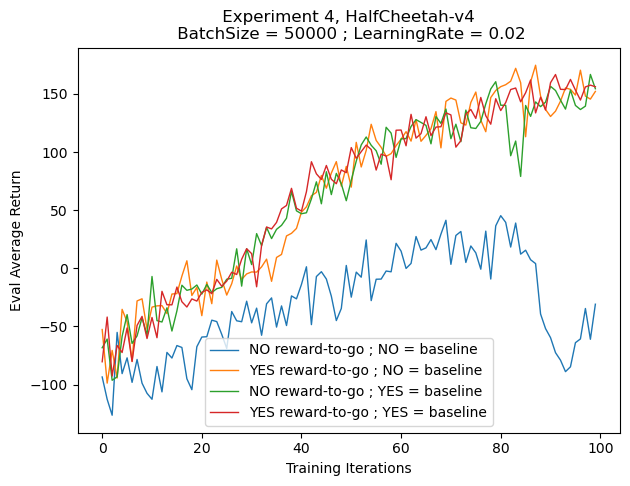

In [18]:
legend_list = ['NO reward-to-go ; NO = baseline',
               'YES reward-to-go ; NO = baseline',
               'NO reward-to-go ; YES = baseline',
               'YES reward-to-go ; YES = baseline']

plt.figure(figsize=(7, 5))
plt.plot(a_df_1["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_2["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_3["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_4["Eval_AverageReturn"], linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 4, HalfCheetah-v4 \n BatchSize = 50000 ; LearningRate = 0.02")
plt.legend(legend_list,fontsize=10)
plt.show()

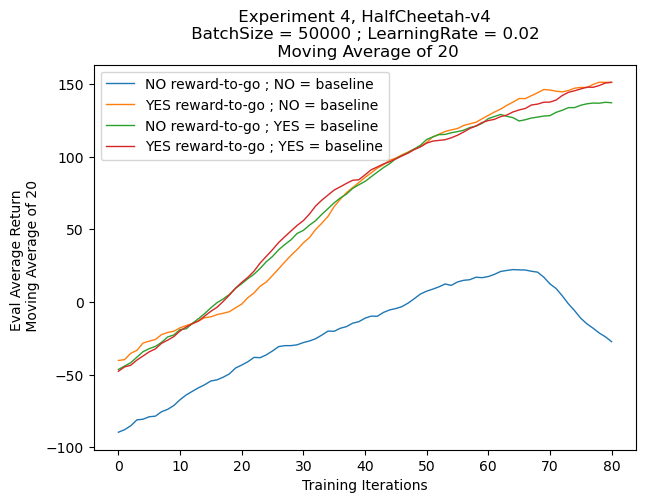

In [19]:
N = 20
legend_list = ['NO reward-to-go ; NO = baseline',
               'YES reward-to-go ; NO = baseline',
               'NO reward-to-go ; YES = baseline',
               'YES reward-to-go ; YES = baseline']

plt.figure(figsize=(7, 5))
plt.plot(np.convolve(a_df_1["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_2["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_3["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_4["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title(" Experiment 4, HalfCheetah-v4 \n BatchSize = 50000 ; LearningRate = 0.02 \n Moving Average of 20")
plt.legend(legend_list,fontsize=10)
plt.show()

# 8 Implementing Generalized Advantage Estimation

### You will now use the value function you previously implemented to implement a simplified version of GAE-λ. This will require filling in the remaining TODO section in pg agent.py:estimate advantage.

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------

## Experiment 5 (HopperV4).

    You will now use your implementation of policy gradient with generalized advantage estimation to learn a controller for a version of Hopper-v4 with noisy actions. Search over λ ∈ [0,0.95,0.98,0.99,1] to replace <λ> below. Note that with a correct implementation, λ = 1 is equivalent to the vanilla neural network baseline estimator. Do not change any of the other hyperparameters (e.g. batch size, learning rate).

    python cs285/scripts/run_hw2.py \
        --env_name Hopper-v4 --ep_len 1000 \
        --discount 0.99 -n 300 -l 2 -s 32 -b 2000 -lr 0.001 \
        --reward_to_go --nn_baseline --action_noise_std 0.5 --gae_lambda <λ> \ 
        --exp_name q5_b2000_r0.001_lambda<λ>
        
### Deliverables:

    Provide a single plot with the learning curves for the Hopper-v4 experiments that you tried. Describe in words how λ affected task performance. The run with the best performance should achieve an average score close to 400.

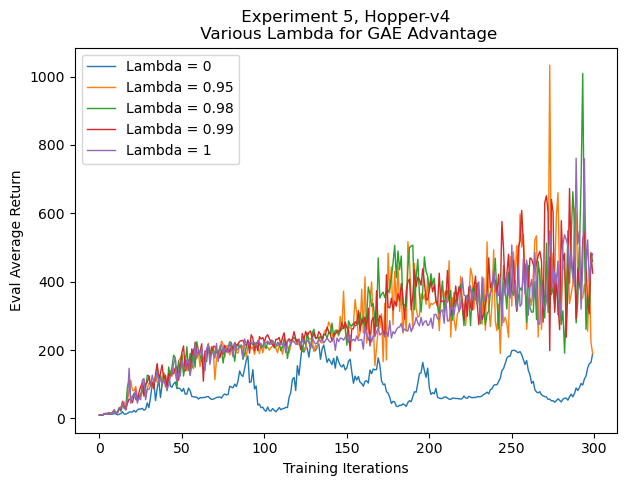

In [20]:
filepath_1 = 'q2_pg_q5_b2000_r0.001_lambda0_Hopper-v4'
filepath_2 = 'q2_pg_q5_b2000_r0.001_lambda0.95_Hopper-v4'
filepath_3 = 'q2_pg_q5_b2000_r0.001_lambda0.98_Hopper-v4'
filepath_4 = 'q2_pg_q5_b2000_r0.001_lambda0.99_Hopper-v4'
filepath_5 = 'q2_pg_q5_b2000_r0.001_lambda1_Hopper-v4'

a_df_1 = to_df(filepath_1)
a_df_2 = to_df(filepath_2)
a_df_3 = to_df(filepath_3)
a_df_4 = to_df(filepath_4)
a_df_5 = to_df(filepath_5)


legend_list = ['Lambda = 0','Lambda = 0.95','Lambda = 0.98', 'Lambda = 0.99', 'Lambda = 1']

plt.figure(figsize=(7, 5))
plt.plot(a_df_1["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_2["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_3["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_4["Eval_AverageReturn"], linewidth=1)
plt.plot(a_df_5["Eval_AverageReturn"], linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return")
plt.title(" Experiment 5, Hopper-v4 \n Various Lambda for GAE Advantage")
plt.legend(legend_list,fontsize=10)
plt.show()

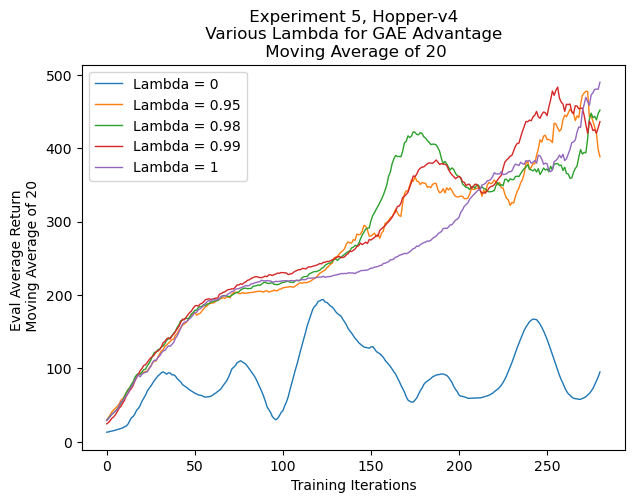

In [21]:
N = 20

legend_list = ['Lambda = 0','Lambda = 0.95','Lambda = 0.98', 'Lambda = 0.99', 'Lambda = 1']

plt.figure(figsize=(7, 5))
plt.plot(np.convolve(a_df_1["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_2["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_3["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_4["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.plot(np.convolve(a_df_5["Eval_AverageReturn"], np.ones(N)/N, mode='valid'), linewidth=1)
plt.xlabel("Training Iterations")
plt.ylabel("Eval Average Return \n Moving Average of 20")
plt.title(" Experiment 5, Hopper-v4 \n Various Lambda for GAE Advantage \n Moving Average of 20")
plt.legend(legend_list,fontsize=10)
plt.show()

### Describe in words how λ affected task performance:
    
    Lambda of 0.95 - 0.99 gave the best result; lambda basically specifies how much the agent is willing to conside future reward and value. A lambda of 0 mean the agent only cares about current reward and value; whereas a lambda of one means the agent cares about future reward and value basically according to the gamma discount factor. Lambda essentially further discounts the future in addition to gamma.

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------